# 01.사이킷런의 기본적인 흐름 이해하기
- 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

In [19]:
# 사용할 데이터 가지고오기
from sklearn.datasets import load_iris

# 분류의 모델로 DT사용하기
from sklearn.tree import DecisionTreeClassifier

# 데이터를 나누기 위해서 사용하기.
from sklearn.model_selection import train_test_split

## 데이터 불러오기 & 데이터 확인

<img src="img/01.png">

In [20]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다. 
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## 데이터 분리하기 : train_test_split, X, y, 비율, seed

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=1234)

In [22]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


## 간단한 DT에 대한 분류 모델 돌려보기

In [23]:
# DecisionTreeClassifier 객체 생성 
#1)모델 불러오기
dt_clf = DecisionTreeClassifier(random_state=1234)

# 학습 수행 ->
# 2)불러온 모델에 대해서 최적의 파라미터를
#주어진 데이터(X_train,y_train)를 바탕으로 찾아가는 과정
# > fit이라는 매서드를 통해서 학습을 수행, 파라미터 최적화 수행 
# dt_clf.fit(iris_data, iris_labels)  > 전체 데이터를 학습, 컨닝 발생 
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

## 학습된 모델을 바탕으로 X_test에 대해서 예측해보기

In [24]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
pred = dt_clf.predict(X_test)
pred

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

## 실전 문제에 대해서 푼 값들에 대한 평가를 해보자

In [25]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 1.0000


 <p>정리 </p>
- 데이터 불러오기<br>
- (분석하기 위한 데이터 전처리 과정 수행) <br>
- 데이터 분리하기<br>
- 모델 학습하기 <br>
- (모델에 대한 최적화 수행) <br>
- 모델 평가하기 <br>
- (여러 모델에 대한 종합적인 모델) <br>

<img src="img/02.png">

# 02. SckiKit에 대한 Framework 이해

###  아래 그림에서 중요한 부분은 모델을 Estimator라고 부르고, ***fit/ predict*** 에 대한 기능임!!   
* cross_val_score같은 evaluation function,  GridSearchCV와 같은 하이퍼파라미터튜닝에 관련된 것은든 아래의 개별 모델 Estimator를 인자로 받아들이게 된다!!!!!   
* 인자로 받은 Estimator 에 대해서 cross_val_score, GridSearchCV.fit() 함수 내에서 Estimator의 fit(), predict()를 호출해서 평가를 하거나 파라미터에 대한 튜닝작업을 수행을 하게 됨!!!

<img src="img/03.png">

## 비지도학습인 : 차원축소, 클러스터링, Feature Extraction 같은 경우에는 대부분이 ***fit / transform*** 을 적용을 한다.
- 이 때의 fit()의 기능은 학습을 의미하는 것이 아니라  ***입력한 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 작업을 수행*** 을 의미하는 거임!!<br>
- 그리고 이 떄의 실제 작업은  ***transform***이 수행을 하게 되어서 직접 변환이 이루어지게 됨.<br>
- 물론 이 떄의 한 번에 결합을 해서 한 번에 해결하기 위해서  ***fit_transform***을 수행하기도 함. 단, 주의사항이 있기는 함;;;


## Scikit Learn 주요 모듈 

<img src="img/04.png">

<img src="img/05.png">

## 03. Model Selection 모듈 소개

### 03-1) train_test_split

* 기능 : 학습데이터와 테스트 테이터를 분리하는 기능 수행 <br>
- test_size : (0.25)전체 데이터 중에서 테스트 테이터를 얼마만큼의 비율로 가져갈지 설정<br>
- shuffle : (True) 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정함. 한 쪽으로 몰려있을 수 있기 때문에 랜덤하게 뽑기 전에 이미 한 번 흔들어서 시작을 하기 위해서 설정하는 부분<br>
- random_state : 난수 발생 -> 재현성<br>
- 출력형태 : X_train, X_test, y_train_ y_test 순서에 유의!!

**<i class="fa fa-question-circle"></i> 질문:** 학습데이터를 바탕으로 실전문제를 푼 경우 --> 즉, 학습에 미리 시험에 나올 문제를 보고 공부를 한 경우임.

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [27]:
iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


--> 미리 나올 문제를 보고 학습을 하였기에 상당히 성능이 높게 나온다!!!
이러한 일이 발생을 하면, 내가 데이터를 뭔가 섞어서 한 것이 아닌가 의심을 해야함!!!

**<i class="fa fa-question-circle"></i> 질문:** 이제 미리 시험문제가 뭐가 나올지 모르는 상태에서 공부를 하기 위해서, 모의고사와 실전 문제로 나누자!!

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)
dt_clf = DecisionTreeClassifier( )
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


--> 역시나 미리 뭐가 나올지 모르는 상태에서 공부를 하게 되니 100%하기가 쉽지 않게 된다..

**<i class="fa fa-question-circle"></i> 질문:**  그러면 random_state를 변경하면 어떻게 될지 알아보자...

In [36]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=222)
dt_clf = DecisionTreeClassifier( )
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9111


### 03-2)  Cross-Validation

* 교차검증 : 앞에서 train_test_split으로 해서해도, 과적합 overfitting의 문제점이 가지고 있음. 즉, 학습에 너무 과하가 최적화가 되어서 새로운 데이터에 성능이 떨어지는 문제점이 존재 <br>
    여러번의 모의고사/실전으로 수행을 하는 부분

<img src="img/06.png">

* k-Fold CV : k 등분해서 하는 방법

<img src="img/07.png">

**<i class="fa fa-question-circle"></i> 질문:** K-Fold에 대해서 알아보기

In [37]:
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [39]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [40]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


* Stratified k Fold : 비율을 유지하면서 불균형한 분포에 대해서 나눌 때..

**<i class="fa fa-question-circle"></i> 질문:**  우선은 k-Fold에 대해서 해보고, 이를 Stratified k-fold에 대해서 해보기ㅡ

In [42]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [43]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [ ]:
# KFold=> 몇 등분
# StratifiedKFold=> 무엇을 기준으로, 몇 등분(고르게 나오게 하기 위하여)

In [44]:
from sklearn.model_selection import StratifiedKFold

In [45]:

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


In [48]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)

# random_state를 하기 위해서는 아래의 경우 처럼 사용..
#skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)->랜덤 적용할때는 shuffle이 필요

n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


* 참고) 회귀의 경우에는  stratified k-fold를 사용할 필요가 없음;;아니 사용하기 힘들다;;;;어떤 비율로 유지할지에 대한 내용이 없기 때문에;;;

### 03-3) cross_val_score : CV를 보다 편하게..

cross_val_score -> 분류모델, 문제, 정답, 평가기준, 몇 등분해서 할지<br>
모델을 가지고 등분해서 나눠주고, 이에 대해서 fit 하고, predict하고, 평가까지 1번에...

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
#cvs:모델, 문제지, 정답지, 뭐로채점, 몇등분..
#scores = cross_val_score(dt_clf, data, label, scoring="accuracy", cv=3, j_jobs=-1)(순서대로 쓰면 파라미터 생략가능(estimator,X,y))
scores = cross_val_score(estimator=dt_clf, X=data, y=label, scoring="accuracy", cv=3, n_jobs=-1)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


참고) cross_validate()도 존재를 하는데, 이것은 여러가지 평가지표를 사용할 때. scoring에서 여러가지 평가지표를 할 때 사용한다...

### 03-4) gridsearchCV

 최적의 파라미터의 조합들에 대해서 알려준다.
 직접 모든 조합에 대해서 다 하는 gridsearch, 분포를 보고 적당한 조합들에 대해서 수행을 하는 randomgridsearch 가 있음.

In [51]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()


In [52]:

### parameter 들을 dictionary 형태로 설정
parameters = {"max_depth":[1,2,3], "min_samples_split":[2,3]}

In [53]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree,param_grid=parameters, cv=3,n_jobs=-1, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [54]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [55]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_
#(전제조건: 주어진 train 데이터를 가지고 최적의 모델을 찾음)

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


## 04. 데이터 전처리

**<i class="fa fa-question-circle"></i> 질문:** ScikitLearn에서 모델을 돌리기 전에 처리해야 하는 주의사항<br>
결측값 입력이 안 됨;;;-> NaN처리 해야함<br>
수치데이터가 아닌 카테고리 변수들을 허용이 안 됨 --> 수치데이터로 변형해야 함<br>


### 04-1) 데이터 인코딩 : label encoding / one hot encoding

Label Encoding <br> 
- 장점 : 그냥 카테고리 변수를 알아서 0부터 숫자로 변경해 줌 <br>
- 단점 : 숫자로 변경이 되다보니 숫자의 크기가 모델에 반영이 됨. 1보다 3이 더 크게 되고, 그러니 3번인 선풍기가 0번인 TV보다 더 중요하게 인식하게 될 수 있는 가능성이 있음. 우리는 그냥 단순 종류인 것인데, 크기에 대한 부분이 반영이 될 수 있다;;;;

In [56]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [61]:
print('인코딩 클래스:',encoder.classes_)
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


<img src="img/08.png">

One Hot Encoding  : 주의사항 --> 숫자로 라벨인코딩을 하고, 이를 바탕으로 원핫인코딩의 작업을 해야함!!! <br> 한 번에 진행하는 부분이 없다는 점!!!!! ---> 꼭 2 Step!!!!

<img src="img/09.png">

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# Step 1) 
# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [72]:
labels.reshape(-1,1)

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]], dtype=int64)

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# Step 1) 
# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# Step 2)
# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


* 참고로 pandas에서는 이를 좀 더 쉽게 하는 부분이 있음 / 데이터 프레임에서는 한번에 만들어줌(라벨->원핫인코딩 두번 안거쳐도 됨) 

In [66]:
import pandas as pd
#one hot encoding 을 하려는 컬럼을 선택해서..
df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 5) Feature Scaling & Normalization

서로 다른 변수의 값의 범위를 일정한 수준으로 맞추는 작업을 의미함

* 일반적인 표준화 : 평균0, 분산1인 분포로 변환하는 것을 의미<br>
<img src="img/10.png">

* 일반적인 정규화 : 서로다른 크기의 값들을 동일한 크기 단위 0~1사이의 값으로 변경<br>
<img src="img/11.png">

주의!!! scikit learn의 Normalizer의 경우에는 선형대수에서 사용하는 정규화개념을 사용을 함.<br>
<img src="img/12.png">

- 교재에서 용어 정리 : 일반적인 의미의 표준화/정규화를 Feature Scaling으로 이야기를 하고, 선형대수의 정규화를 "벡터 정규화"<br>
- 대표적인 Feature Scaling : Standard Sclaer, MinMaxScaler에 대해서 알아보겠음.

### 05-1) Standard Scaler : 평균0, 분산1으로 변환

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())


feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [38]:
from sklearn.preprocessing import StandardScaler


In [39]:
# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())#->모든 컬럼의 평균이:0
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())#->모든 컬럼의 분산이:1

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### 05-2) MinMaxScaler : 0~1사이의 값으로...혹시 음수의 값이 있다면 -1~+1의 값으로 변환을 함.

In [40]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


* 주의사항) train과 test의 변환 기준이 동일해야 한다.

In [41]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [42]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()
# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)
# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [43]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)
# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  
test_scaled = scaler.transform(test_array)
# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [44]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


# Titanic Data 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read_csv  로 데이터 불러오기..
titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titanic_df['Age'].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df['Cabin'].fillna("N", inplace=True)
titanic_df['Embarked'].fillna("N", inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [4]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
C22 C26          3
              ... 
A24              1
D56              1
F E69            1
B80              1
C111             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
# 앞 글자 1개 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
# titanic_df['Cabin'] = titanic_df['Cabin'].apply(lambda x:str(x)[:1])
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [7]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [9]:
# groupby 이용해서,,,아래와 같이 표현... count 를 활용...
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

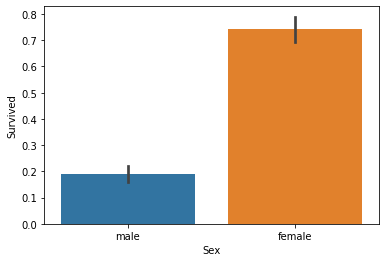

In [11]:
# 아래와 같은 성별에 따른 생존율 그래프..
sns.barplot(x="Sex", y = "Survived", data=titanic_df)

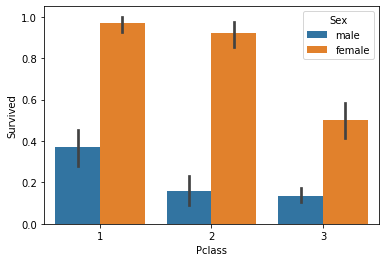

In [12]:
# 아래와 같은 객실등급별 그래프..
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)

In [14]:
titanic_df["Age"].

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

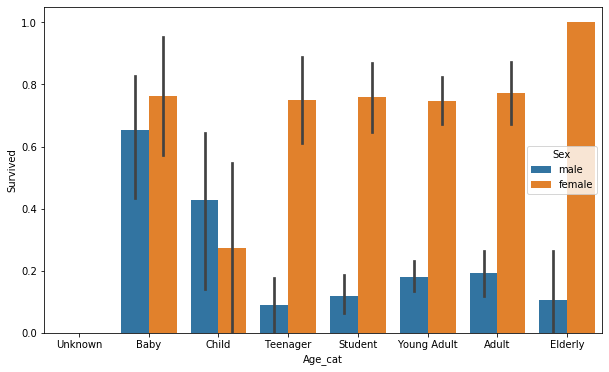

In [16]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat=""
    if age<0:
        cat="Unknown"
    elif age<=5:
        cat="Baby"
    elif age<=12:
        cat="Child"
    elif age<=18:
        cat="Teenager"
    elif age<=25:
        cat="Student"
    elif age<=35:
        cat="Young Adult"
    elif age<=60:
        cat="Adult"
    else:
        cat="Elderly"
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [17]:
from sklearn import preprocessing

def encode_features(dataDF):
    #카테고리 변수들의 컬럼들을 만들고, 이것들을 일관되게 인코딩..
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [22]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna("N", inplace=True)
    df['Embarked'].fillna("N", inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(["PassengerId","Name","Ticket"], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [23]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv("titanic_train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df= titanic_df.drop("Survived", axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [24]:
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int32  
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 45.4 KB


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


In [31]:
print(y_titanic_df.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.616162
1    0.383838
Name: Survived, dtype: float64
0    0.605337
1    0.394663
Name: Survived, dtype: float64
0    0.659218
1    0.340782
Name: Survived, dtype: float64


In [28]:
#y_titanic_df의 비율을 유지하여 train,test를 나눔 => satify=y_titanic_df
# X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
#                                                   test_size=0.2, stratify=y_titanic_df, random_state=11)

In [29]:
# print(y_titanic_df.value_counts(normalize=True))
# print(y_train.value_counts(normalize=True))
# print(y_test.value_counts(normalize=True))

0    0.616162
1    0.383838
Name: Survived, dtype: float64
0    0.616573
1    0.383427
Name: Survived, dtype: float64
0    0.614525
1    0.385475
Name: Survived, dtype: float64


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


C:\Users\acorn-508\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [35]:
from sklearn.model_selection import cross_val_score
#몇 등분-> 각기 시행해서 학습-> 평가..

scores = cross_val_score(dt_clf,X_train,y_train,cv=5,scoring="accuracy", n_jobs=-1)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7483
교차 검증 1 정확도: 0.7552
교차 검증 2 정확도: 0.7676
교차 검증 3 정확도: 0.7958
교차 검증 4 정확도: 0.7887
평균 정확도: 0.7711


In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth":[2,3,5,10],
    "min_samples_split":[2,3,5],
    "min_samples_leaf":[1,5,8]
}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, cv=5, scoring="accuracy")
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
